In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import scipy
from skimage import color, filters, exposure, measure, morphology, util
from segmentflow import segment, view
%load_ext autoreload
%autoreload 2

In [82]:
# Calculate spatial properties
ct_spatial_res = 2.06
spatial_reses = []
min_peak_distances = []
for grid_delta in [59.5, 29.5, 14.7]:
    print(f'{grid_delta=}')
    spatial_res = ct_spatial_res * grid_delta
    spatial_reses.append(spatial_res)
    print(f'{spatial_res=}')
    # min_peak_distance = 75/spatial_res
    # min_peak_distance = 106/spatial_res
    min_peak_distance = 150/spatial_res
    print(f'{min_peak_distance=}')
    if min_peak_distance < 1:
        min_peak_distance = 1
    min_peak_distance = int(min_peak_distance)
    min_peak_distances.append(min_peak_distance)
    print()
i = 0
spatial_res = spatial_reses[i]
min_peak_distance = min_peak_distances[i]

grid_delta=59.5
spatial_res=122.57000000000001
min_peak_distance=1.2237904870686138

grid_delta=29.5
spatial_res=60.77
min_peak_distance=2.468323185782458

grid_delta=14.7
spatial_res=30.282
min_peak_distance=4.953437685753913



In [51]:
ui = {
    'in_dir_path'       : 'C:/Users/gusb/Research/mhe-analysis/data/stlToTiff_output/output_01',
    'file_suffix'       : '.tiff',
    'slice_crop'        : None,
    'row_crop'          : None,
    'col_crop'          : None,
    'spatial_res'       : spatial_res,
    'binder_val'        : 100,
    'particle_val'      : 65000,
    'out_dir_path'      : 'C:/Users/gusb/Research/mhe-analysis/results/stlToTiff_output/segmentflow_01',
    'out_prefix'        : 'output_01',
    'min_peak_distance' : min_peak_distance,
    'overwrite'         : True,
    'save_checkpoints'  : 'show',
    'nslices'           : 5,
    'save_stl'          : False,
    'save_voxels'       : False,
}

## Load images


C:\Users\gusb\Research\mhe-analysis\data\stlToTiff_output\output_01
Loading images...
--> Images loaded as 3D array:  (50, 78, 78)
--> Plotting images: [ 0 12 24 36 49]


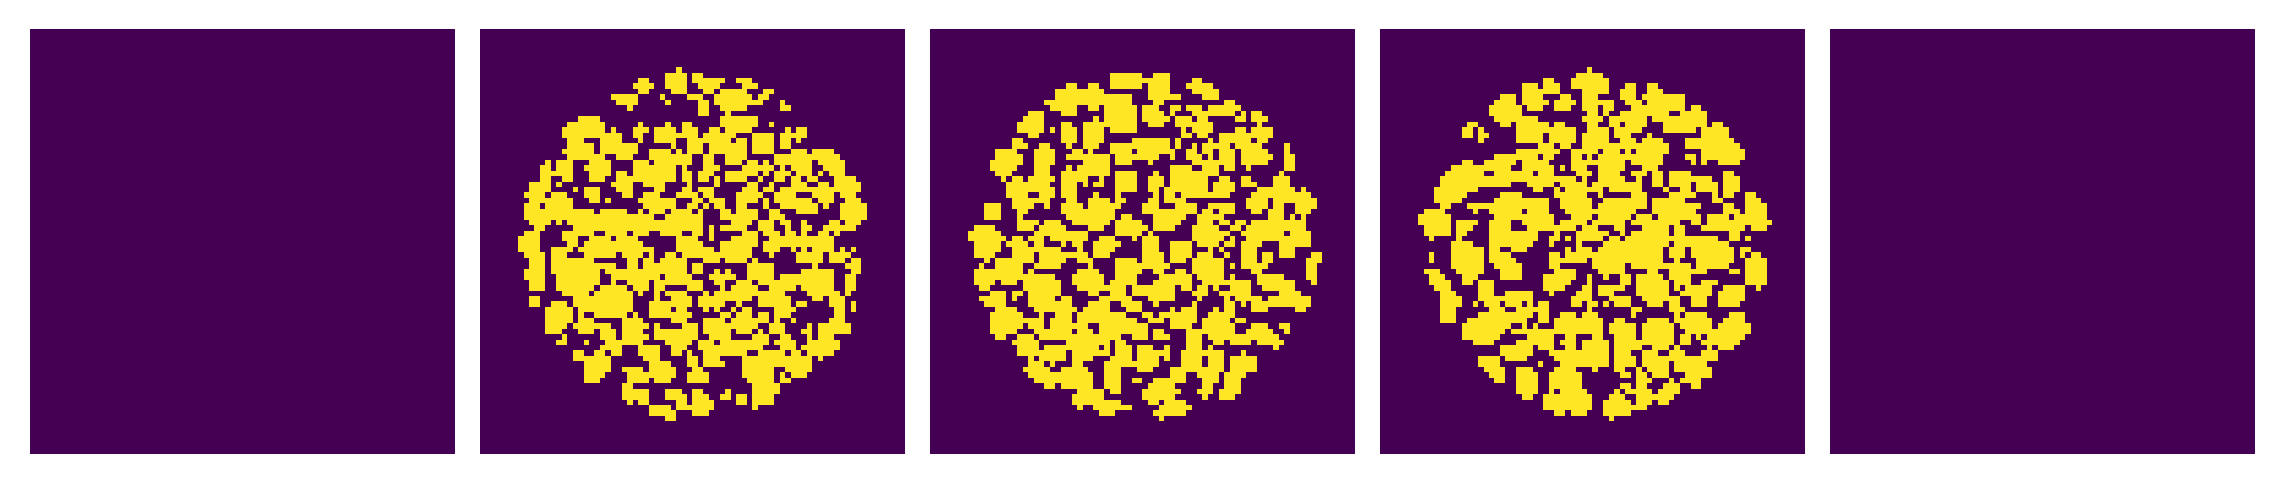

In [21]:
n_fig_digits = 2
fig_n = 0
if not Path(ui['out_dir_path']).exists():
    Path(ui['out_dir_path']).mkdir(parents=True)
#-------------#
# Load images #
#-------------#
print()
print(Path(ui['in_dir_path']).resolve())
imgs_semantic = segment.load_images(
    ui['in_dir_path'],
    slice_crop=ui['slice_crop'],
    row_crop=ui['row_crop'],
    col_crop=ui['col_crop'],
    file_suffix=ui['file_suffix']
)
imgs_semantic = imgs_semantic.astype(int)
imgs_semantic[imgs_semantic == ui['binder_val']] = 1
imgs_semantic[imgs_semantic == ui['particle_val']] = 2
fig, axes = view.plot_slices(
    imgs_semantic,
    nslices=ui['nslices'],
    fig_w=7.5,
    dpi=300
)
if ui['save_checkpoints'] == 'show':
    plt.show()
elif ui['save_checkpoints'] == True:
    plt.savefig(
        Path(ui['out_dir_path'])
        / f'{str(fig_n).zfill(n_fig_digits)}-semantic-seg-imgs.png')

Segmenting images...
--> Segmentation complete. 1754 particle(s) segmented.


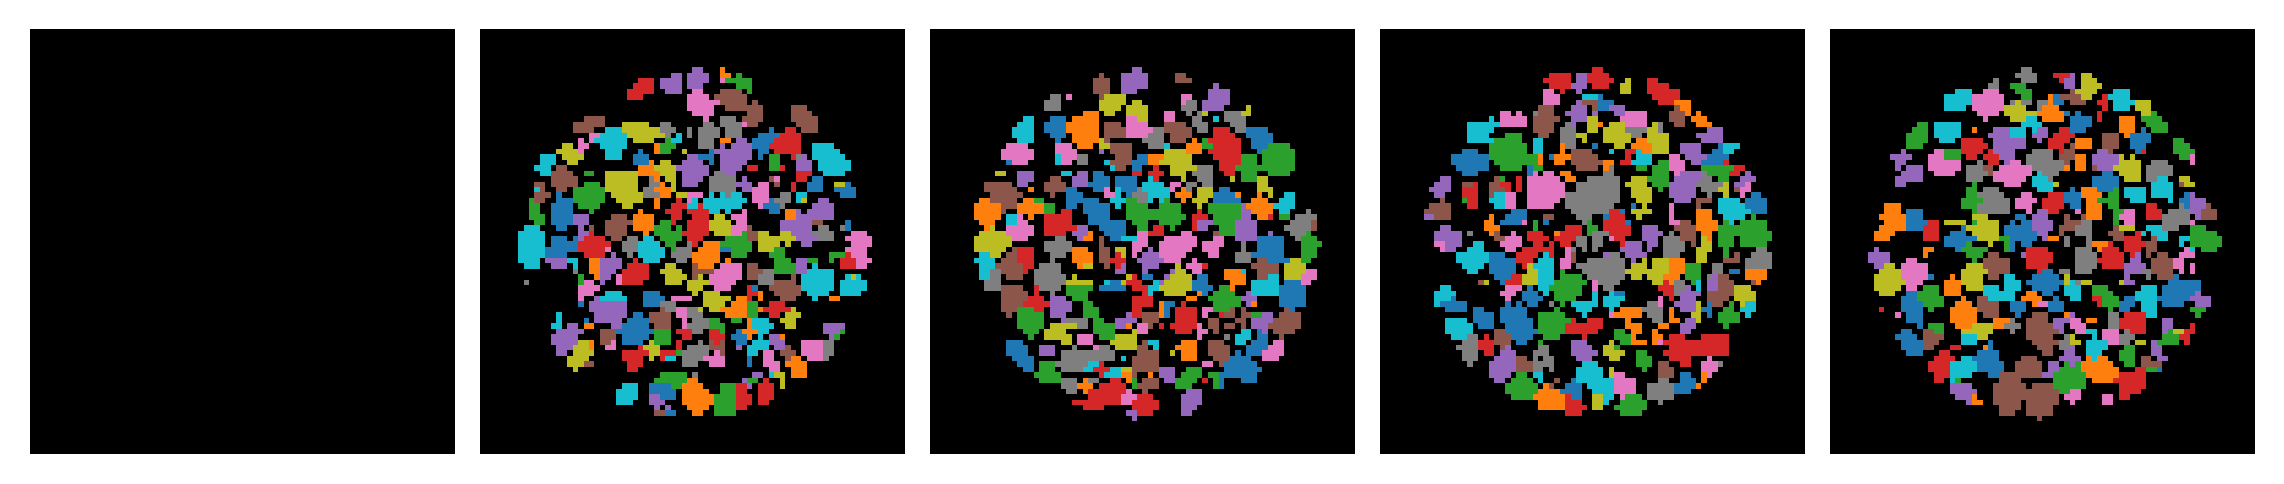

In [52]:
# Segment images
imgs_labeled = segment.watershed_segment(
    imgs_semantic==2,
    min_peak_distance=ui['min_peak_distance'],
    exclude_borders=False,
    return_dict=False
)
fig, axes = view.plot_color_labels(
    imgs_labeled,
    nslices=ui['nslices'],
    fig_w=7.5,
    dpi=300
)
fig_n += 1
if ui['save_checkpoints'] == 'show':
    plt.show()
elif ui['save_checkpoints'] == True:
    plt.savefig(
        Path(ui['out_dir_path'])
        / f'{str(fig_n).zfill(n_fig_digits)}-instance-seg-imgs.png')

In [53]:
#--------------#
# Save outputs #
#--------------#
if ui['save_stl']:
    segment.save_as_stl_files(
        imgs_labeled,
        ui['out_dir_path'],
        ui['out_prefix'],
        make_new_save_dir=True,
        spatial_res=ui['spatial_res'],
        stl_overwrite=ui['overwrite']
    )
# save images
if ui['save_voxels']:
    segment.save_images(
        imgs_labeled,
        Path(ui['out_dir_path']) / f"{ui['out_prefix']}_labeled_voxels"
    )


Generating surface meshes...
Surface mesh not created for particle 1: Particle smaller than minimum width in at least one dimension.
Surface mesh not created for particle 2. Particle likely too small. Error:  No surface found at the given iso value.
Surface mesh not created for particle 3: Particle smaller than minimum width in at least one dimension.
Surface mesh not created for particle 5: Particle smaller than minimum width in at least one dimension.
Surface mesh not created for particle 7. Particle likely too small. Error:  No surface found at the given iso value.
Surface mesh not created for particle 8: Particle smaller than minimum width in at least one dimension.
Surface mesh not created for particle 9: Particle smaller than minimum width in at least one dimension.
Surface mesh not created for particle 10: Particle smaller than minimum width in at least one dimension.
Surface mesh not created for particle 12. Particle likely too small. Error:  No surface found at the given iso v